In [91]:
from understat import Understat as stat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import asyncio
import json

import aiohttp

from understat import Understat


async def all_understat_players():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_league_players(
            "epl",
            2022,
        )
        return json.dumps(players)

players = asyncio.run(all_understat_players())
players = json.loads(players)
players = list(players)





In [102]:
async def league_results():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        fixtures = await understat.get_league_results(
            "epl",
            2021
        )
        return(json.dumps(fixtures))

games = asyncio.run(league_results())
games = json.loads(games)
games = list(games)

In [104]:
games = pd.DataFrame.from_dict(games)
mun_game = games[(games["h"] == {'id': '89', 'title': 'Manchester United', 'short_title': 'MUN'}) | (games["a"] == {'id': '89', 'title': 'Manchester United', 'short_title': 'MUN'})].reset_index()
mun_home = games[games["h"] == {'id': '89', 'title': 'Manchester United', 'short_title': 'MUN'}]
mun_away = games[games["a"] == {'id': '89', 'title': 'Manchester United', 'short_title': 'MUN'}]

In [105]:
mun_home.columns

Index(['id', 'isResult', 'h', 'a', 'goals', 'xG', 'datetime', 'forecast'], dtype='object')

In [106]:
goals_scored = []
expected_goals = []

def home_goals(row):
    e = row["goals"]
    goals_scored.append(row["goals"]['h'])
    expected_goals.append(row["xG"]["h"])

def away_goals(row):
    goals_scored.append(row["goals"]['a'])
    expected_goals.append(row["xG"]["a"])

mun_home.apply(lambda x: home_goals(x), axis=1)
mun_away.apply(lambda x: away_goals(x), axis=1)

expected_goals = [float(s) for s in expected_goals]
goals_scored = [float(s) for s in goals_scored]

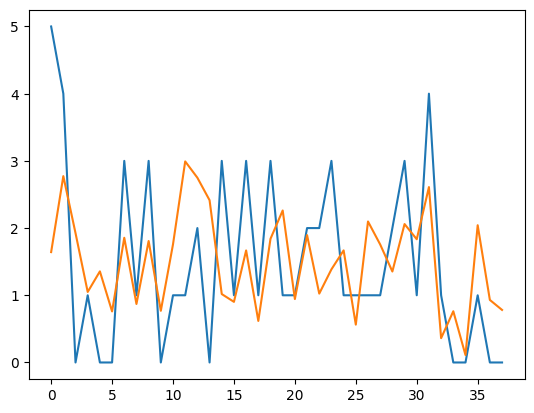

In [107]:
x = np.arange(0.0,len(goals_scored)*1.0)
plt.plot(x,goals_scored)
plt.plot(x,expected_goals)

In [96]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])